# Tests on semantic similarity measures

### Comparison of semantic graphs (Semgraphs)

In [1]:
import sys

In [2]:
PATHS_TO_ADD = [
    "../src"
]
for p in PATHS_TO_ADD:
    if p not in sys.path:
        sys.path.append(p)

In [3]:
from linguistic_analysis.semantics.similarity import SemGraph

In [4]:
s_graph = SemGraph(["a", "b", "c", "d", "e"])

In [5]:
s_graph.add_edge_with_names("a", "b", 0.1)
s_graph.add_edge_with_names("a", "c", 0.1)
s_graph.add_edge_with_names("b", "c", 0.1)
s_graph.add_edge_with_names("b", "d", 0.1)
s_graph.add_edge_with_names("e", "d", 0.1)

In [6]:
s_graph.graph.nodes

NodeView((0, 1, 2, 3, 4))

In [7]:
s_graph.graph.edges

EdgeView([(0, 1), (0, 2), (1, 2), (1, 3), (3, 4)])

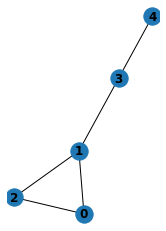

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

plt.subplot(121)
nx.draw(s_graph.graph, with_labels=True, font_weight='bold')

In [9]:
for i in range(s_graph.dimension):
    print(s_graph.graph.nodes[i]["name"])
    print(s_graph.graph.nodes[i])
    print(s_graph.graph.nodes[i]["s"])

a
{'name': 'a', 's': array([1., 0., 0., 0., 0.])}
[1. 0. 0. 0. 0.]
b
{'name': 'b', 's': array([0., 1., 0., 0., 0.])}
[0. 1. 0. 0. 0.]
c
{'name': 'c', 's': array([0., 0., 1., 0., 0.])}
[0. 0. 1. 0. 0.]
d
{'name': 'd', 's': array([0., 0., 0., 1., 0.])}
[0. 0. 0. 1. 0.]
e
{'name': 'e', 's': array([0., 0., 0., 0., 1.])}
[0. 0. 0. 0. 1.]


In [10]:
s_graph.get_score_vectors()

[array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 1.])]

In [11]:
s_graph.propagate(5)

In [12]:
list(s_graph.graph.neighbors(0))

[1, 2]

In [13]:
s_graph.graph.nodes[0]

{'name': 'a',
 's': array([0.83295118, 0.38713745, 0.39055766, 0.06127203, 0.00523224]),
 's_temp': array([0.88199508, 0.33084263, 0.33315291, 0.04039305, 0.00232058])}

In [14]:
s_graph.get_score_vectors()

[array([0.83295118, 0.38713745, 0.39055766, 0.06127203, 0.00523224]),
 array([0.36444642, 0.79586363, 0.36444642, 0.31281159, 0.05574584]),
 array([0.39055766, 0.38713745, 0.83295118, 0.06127203, 0.00523224]),
 array([0.06306849, 0.34265337, 0.06306849, 0.86430365, 0.35722905]),
 array([0.00590781, 0.06557263, 0.00590781, 0.38324082, 0.92128003])]

In [15]:
s_graph.reset()
s_graph.get_score_vectors()

[array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 1.])]

In [16]:
s_graph.propagate(1)
s_graph.get_score_vectors()

[array([0.9919971 , 0.08927974, 0.08927974, 0.        , 0.        ]),
 array([0.08892603, 0.98806704, 0.08892603, 0.08892603, 0.        ]),
 array([0.08927974, 0.08927974, 0.9919971 , 0.        , 0.        ]),
 array([0.        , 0.08927974, 0.        , 0.9919971 , 0.08927974]),
 array([0.        , 0.        , 0.        , 0.0896377 , 0.99597444])]

In [17]:
s_graph.propagate(1)
s_graph.get_score_vectors()

[array([0.96743704, 0.17874011, 0.17904901, 0.00768101, 0.        ]),
 array([0.1755361 , 0.9539944 , 0.1755361 , 0.16796277, 0.00757333]),
 array([0.17904901, 0.17874011, 0.96743704, 0.00768101, 0.        ]),
 array([0.00770087, 0.17147084, 0.00770087, 0.96996989, 0.17215561]),
 array([0.        , 0.00787872, 0.        , 0.17543359, 0.98445974])]

In [18]:
s_graph.reset()
s_graph.propagate(1000, lambda i: 0.1)
s_graph.get_score_vectors()

[array([0.43348446, 0.52815058, 0.43348446, 0.46506764, 0.35909818]),
 array([0.43253394, 0.52770068, 0.43253394, 0.46610991, 0.360697  ]),
 array([0.43348446, 0.52815058, 0.43348446, 0.46506764, 0.35909818]),
 array([0.43016268, 0.52657041, 0.43016268, 0.46868706, 0.36465898]),
 array([0.42856151, 0.52580091, 0.42856151, 0.47040894, 0.36731307])]

In [19]:
s_graph.reset()
s_graph.propagate(1000, lambda i: 1.0)
s_graph.get_score_vectors()

[array([0.43311762, 0.54356685, 0.43311762, 0.46119192, 0.34154846]),
 array([0.43311762, 0.54356685, 0.43311762, 0.46119192, 0.34154846]),
 array([0.43311762, 0.54356685, 0.43311762, 0.46119192, 0.34154846]),
 array([0.43311762, 0.54356685, 0.43311762, 0.46119192, 0.34154846]),
 array([0.43311762, 0.54356685, 0.43311762, 0.46119192, 0.34154846])]

In [20]:
s_graph.reset()
s_graph.propagate(1000, lambda i: 1000.0)
s_graph.get_score_vectors()

[array([0.4646884 , 0.61660183, 0.4646884 , 0.38883206, 0.19167995]),
 array([0.4646884 , 0.61660183, 0.4646884 , 0.38883206, 0.19167995]),
 array([0.4646884 , 0.61660183, 0.4646884 , 0.38883206, 0.19167995]),
 array([0.4646884 , 0.61660183, 0.4646884 , 0.38883206, 0.19167995]),
 array([0.4646884 , 0.61660183, 0.4646884 , 0.38883206, 0.19167995])]

In [28]:
s_graph.reset()
s_graph.propagate(5, lambda i: 0.9, normalize=False)
s_graph.get_score_vectors()

[array([1.17894721, 0.56223459, 0.55491506, 0.08997158, 0.00764757]),
 array([0.56223459, 1.26159927, 0.56223459, 0.47991058, 0.08232401]),
 array([0.55491506, 0.56223459, 1.17894721, 0.08997158, 0.00764757]),
 array([0.08997158, 0.47991058, 0.08997158, 1.16398011, 0.46461543]),
 array([0.00764757, 0.08232401, 0.00764757, 0.46461543, 1.0816561 ])]

In [33]:
s_graph.graph[0][1]["similarity"]

0.1

In [22]:
s_graph.reset()

In [24]:
for j in range(s_graph.dimension):
    s_graph.graph.nodes[j]["s_temp"] = s_graph.graph.nodes[j]["s"]


In [31]:
s_update = 0
j=0
for n in s_graph.graph.neighbors(j):
    s_update += s_graph.graph.nodes[n]["s_temp"]*s_graph.graph[j][n]["similarity"]
s_graph.graph.nodes[j]["s"] += 0.9*s_update


In [33]:
s_graph.graph.nodes[0]

{'name': 'a',
 's': array([1.  , 0.09, 0.09, 0.  , 0.  ]),
 's_temp': array([1.  , 0.09, 0.09, 0.  , 0.  ])}

In [34]:
s_update = 0
j=1
for n in s_graph.graph.neighbors(j):
    s_update += s_graph.graph.nodes[n]["s_temp"]*s_graph.graph[j][n]["similarity"]
s_graph.graph.nodes[j]["s"] += 0.9*s_update


In [37]:
s_graph.graph.nodes[1]

{'name': 'b',
 's': array([0.09  , 1.0081, 0.0981, 0.09  , 0.    ]),
 's_temp': array([0.09  , 1.0081, 0.0981, 0.09  , 0.    ])}

### Build Semgraphs

In [4]:
import os
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

Load the embedding model

In [5]:
#MODEL_PATH = "../models/french_novels/balzac/"
#MODEL_PATH = "../models/french_novels/balzac/accents"
MODEL_PATH = "../models/french_novels/balzac/accents_lemmatized"
MODEL_FILE = "balzac_w2v_sg_w10_mincount5_ep/balzac_w2v_sg_w10_mincount5_ep.model"
#MODEL_FILE = "balzac_w2v_cbow_w10_ep20_mincount5.model"

#model = Word2Vec.load(os.path.join(MODEL_PATH, MODEL_FILE))

model = KeyedVectors.load(os.path.join(MODEL_PATH, MODEL_FILE))

    1. Argent
    2. Payement = paiement
    3. Banque
    4. Banquier
    5. Crédit
    6. Créancier
    7. Capital
    8. Dépôt
    9. Prêt
    10. Remboursement
    11. Créance
    12. Prix
    13. Dette
    14. Bail
    15. Revenus (se pone únicamente en plural)
    16. Rente
    17. Francs (moneda; plural)
    18. Louis d’or (moneda, plural)
    19. Écus (moneda, plural)
    20. Budget

In [6]:

base_words = [
    "argent",
    "payement", 
    "paiement",
    "banque",
    "banquier",
    "crédit",
    "créancier",
    "capital",
    "dépôt",
    "prêt",
    "remboursement",
    "créance",
    "prix",
    "dette",
    "bail",
    "revenus",
    "rente",
    "francs",
#    "louis d’or",
    "écus",
    "budget"
]

base_words = [
    "argent",
    "payement", 
    "paiement",
    "banque",
    "banquier",
    "crédit",
    "créancier",
    "capital",
    "dépôt",
    "prêt",
    "remboursement",
    "créance",
    "prix",
    "dette",
    "bail",
    "revenu",
    "rente",
    "franc",
#    "louis d’or",
    "écus",
    "budget"
]

In [7]:
sem_graph = SemGraph.build_from_gensim_embedding(model, base_words, n_top_similar=10, similarity_threshold=0.4)

In [8]:
sem_graph.graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115))

In [9]:
sem_graph.indexes

{'acquisition': 0,
 'adjudication': 1,
 'appointement': 2,
 'argent': 3,
 'arpent': 4,
 'bail': 5,
 'balance': 6,
 'banque': 7,
 'banquier': 8,
 'bilan': 9,
 'billet': 10,
 'bordereau': 11,
 'bourse': 12,
 'budget': 13,
 'bénéfice': 14,
 'caisse': 15,
 'caissier': 16,
 'capital': 17,
 'capitaliste': 18,
 'cartouche': 19,
 'cautionnement': 20,
 'cent': 21,
 'charte': 22,
 'chiffre': 23,
 'client': 24,
 'code': 25,
 'commission': 26,
 'comptant': 27,
 'concordat': 28,
 'créance': 29,
 'créancier': 30,
 'crédit': 31,
 'dette': 32,
 'dividende': 33,
 'domaine': 34,
 'domicile': 35,
 'dot': 36,
 'droguist': 37,
 'droi': 38,
 'ducat': 39,
 'débiteur': 40,
 'déposer': 41,
 'dépôt': 42,
 'empoigneur': 43,
 'escompte': 44,
 'exemplaire': 45,
 'exploitation': 46,
 'failli': 47,
 'fermage': 48,
 'fisc': 49,
 'fonds': 50,
 'forcer': 51,
 'fortune': 52,
 'franc': 53,
 'gain': 54,
 'garantie': 55,
 'hausse': 56,
 'hypothèque': 57,
 'impôt': 58,
 'intégral': 59,
 'keller': 60,
 'lecamu': 61,
 'liquid

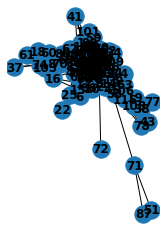

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

plt.subplot(121)
nx.draw(sem_graph.graph, with_labels=True, font_weight='bold')

In [11]:
#nx.write_gexf(sem_graph.graph, "test.gexf")
sem_graph.save_to_gefx("test.gexf")

In [12]:
sem_graph.graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115))

In [13]:
sem_graph_augmented = sem_graph.get_augmented_graph(["n1", "n2", "n3"])

['recouvrement', 'déposer', 'trent', 'garantie', 'bourse', 'failli', 'procédure', 'balance', 'or', 'hausse', 'usufruit', 'économie', 'empoigneur', 'remise', 'budget', 'banquier', 'comptant', 'écus', 'caissier', 'successeur', 'appointement', 'marchandise', 'remboursement', 'débiteur', 'liquidateur', 'prime', 'dette', 'placement', 'prêt', 'loyer', 'dividende', 'charte', 'n2', 'cartouche', 'gain', 'vente', 'tillet', 'capitaliste', 'forcer', 'commission', 'million', 'billet', 'droguist', 'bénéfice', 'rente', 'fonds', 'franc', 'bail', 'propriété', 'dot', 'tiers', 'dépôt', 'piqûre', 'viager', 'écu', 'prêteur', 'maximum', 'créancier', 'acquisition', 'domaine', 'valeur', 'fortune', 'keller', 'cautionnement', 'unième', 'porteur', 'exploitation', 'code', 'livre', 'payement', 'paiement', 'négociant', 'pension', 'syndic', 'piastre', 'crédit', 'exemplaire', 'bilan', 'fisc', 'intégral', 'prix', 'concordat', 'bordereau', 'banque', 'notaire', 'caisse', 'lecamu', 'fermage', 'cent', 'client', 'créance',

In [14]:
sem_graph_augmented.graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118))

In [15]:
sem_graph.indexes

{'acquisition': 0,
 'adjudication': 1,
 'appointement': 2,
 'argent': 3,
 'arpent': 4,
 'bail': 5,
 'balance': 6,
 'banque': 7,
 'banquier': 8,
 'bilan': 9,
 'billet': 10,
 'bordereau': 11,
 'bourse': 12,
 'budget': 13,
 'bénéfice': 14,
 'caisse': 15,
 'caissier': 16,
 'capital': 17,
 'capitaliste': 18,
 'cartouche': 19,
 'cautionnement': 20,
 'cent': 21,
 'charte': 22,
 'chiffre': 23,
 'client': 24,
 'code': 25,
 'commission': 26,
 'comptant': 27,
 'concordat': 28,
 'créance': 29,
 'créancier': 30,
 'crédit': 31,
 'dette': 32,
 'dividende': 33,
 'domaine': 34,
 'domicile': 35,
 'dot': 36,
 'droguist': 37,
 'droi': 38,
 'ducat': 39,
 'débiteur': 40,
 'déposer': 41,
 'dépôt': 42,
 'empoigneur': 43,
 'escompte': 44,
 'exemplaire': 45,
 'exploitation': 46,
 'failli': 47,
 'fermage': 48,
 'fisc': 49,
 'fonds': 50,
 'forcer': 51,
 'fortune': 52,
 'franc': 53,
 'gain': 54,
 'garantie': 55,
 'hausse': 56,
 'hypothèque': 57,
 'impôt': 58,
 'intégral': 59,
 'keller': 60,
 'lecamu': 61,
 'liquid

In [16]:
sem_graph_augmented.indexes

{'acquisition': 0,
 'adjudication': 1,
 'appointement': 2,
 'argent': 3,
 'arpent': 4,
 'bail': 5,
 'balance': 6,
 'banque': 7,
 'banquier': 8,
 'bilan': 9,
 'billet': 10,
 'bordereau': 11,
 'bourse': 12,
 'budget': 13,
 'bénéfice': 14,
 'caisse': 15,
 'caissier': 16,
 'capital': 17,
 'capitaliste': 18,
 'cartouche': 19,
 'cautionnement': 20,
 'cent': 21,
 'charte': 22,
 'chiffre': 23,
 'client': 24,
 'code': 25,
 'commission': 26,
 'comptant': 27,
 'concordat': 28,
 'créance': 29,
 'créancier': 30,
 'crédit': 31,
 'dette': 32,
 'dividende': 33,
 'domaine': 34,
 'domicile': 35,
 'dot': 36,
 'droguist': 37,
 'droi': 38,
 'ducat': 39,
 'débiteur': 40,
 'déposer': 41,
 'dépôt': 42,
 'empoigneur': 43,
 'escompte': 44,
 'exemplaire': 45,
 'exploitation': 46,
 'failli': 47,
 'fermage': 48,
 'fisc': 49,
 'fonds': 50,
 'forcer': 51,
 'fortune': 52,
 'franc': 53,
 'gain': 54,
 'garantie': 55,
 'hausse': 56,
 'hypothèque': 57,
 'impôt': 58,
 'intégral': 59,
 'keller': 60,
 'lecamu': 61,
 'liquid

In [17]:
sem_graph_augmented.indexes

{'acquisition': 0,
 'adjudication': 1,
 'appointement': 2,
 'argent': 3,
 'arpent': 4,
 'bail': 5,
 'balance': 6,
 'banque': 7,
 'banquier': 8,
 'bilan': 9,
 'billet': 10,
 'bordereau': 11,
 'bourse': 12,
 'budget': 13,
 'bénéfice': 14,
 'caisse': 15,
 'caissier': 16,
 'capital': 17,
 'capitaliste': 18,
 'cartouche': 19,
 'cautionnement': 20,
 'cent': 21,
 'charte': 22,
 'chiffre': 23,
 'client': 24,
 'code': 25,
 'commission': 26,
 'comptant': 27,
 'concordat': 28,
 'créance': 29,
 'créancier': 30,
 'crédit': 31,
 'dette': 32,
 'dividende': 33,
 'domaine': 34,
 'domicile': 35,
 'dot': 36,
 'droguist': 37,
 'droi': 38,
 'ducat': 39,
 'débiteur': 40,
 'déposer': 41,
 'dépôt': 42,
 'empoigneur': 43,
 'escompte': 44,
 'exemplaire': 45,
 'exploitation': 46,
 'failli': 47,
 'fermage': 48,
 'fisc': 49,
 'fonds': 50,
 'forcer': 51,
 'fortune': 52,
 'franc': 53,
 'gain': 54,
 'garantie': 55,
 'hausse': 56,
 'hypothèque': 57,
 'impôt': 58,
 'intégral': 59,
 'keller': 60,
 'lecamu': 61,
 'liquid

In [18]:
sem_graph.get_edge_similarity("argent", "valeur")

0.48235446

In [19]:
sem_graph_augmented.get_edge_similarity("argent", "valeur")

0.48235446

In [20]:
for n1 in sem_graph.names:
    for n2 in sem_graph.names:
        assert(sem_graph.get_edge_similarity(n1, n2) == sem_graph_augmented.get_edge_similarity(n1, n2))

In [23]:
sem_graph_augmented.graph.nodes[70]

{'name': 'n2',
 's': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [15]:
s_g = sem_graph.graph.copy()

In [33]:
for n in s_g.nodes:
    s_g.nodes[n]["s"] = str(s_g.nodes[n]["s"])

In [37]:
for n in s_g.nodes:
    print(s_g.nodes[n])

{'name': 'argent', 's': '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'avancement', 's': '[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'bilan', 's': '[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'cautionnement', 's': '[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'compatriote', 's': '[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'compte', 's': '[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'concours', 's': '[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'credit', 's': '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'domicile', 's': '[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'egard', 's': '[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{'name': 'escompte', 's': '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'}
{

In [22]:
model.most_similar(["argent"])

[('etablissement', 0.6673620343208313),
 ('avancement', 0.6112448573112488),
 ('indigence', 0.6060957908630371),
 ('egard', 0.5945424437522888),
 ('imprimerie', 0.5909165143966675),
 ('heritage', 0.5888705253601074),
 ('honneur', 0.583671510219574),
 ('exploitation', 0.579831600189209),
 ('credit', 0.5793435573577881),
 ('escompte', 0.5681301951408386)]

In [24]:
model.most_similar_cosmul(["argent"])

[('etablissement', 0.8336802124977112),
 ('avancement', 0.8056216835975647),
 ('indigence', 0.8030471205711365),
 ('egard', 0.7972704768180847),
 ('imprimerie', 0.7954574823379517),
 ('heritage', 0.7944344878196716),
 ('honneur', 0.7918350100517273),
 ('exploitation', 0.7899150252342224),
 ('credit', 0.789671003818512),
 ('escompte', 0.7840643525123596)]

In [27]:
#?model.most_similar_to_given

In [32]:
#?model.rank

In [37]:
#?model.relative_cosine_similarity

In [40]:
#?model.distance

In [44]:
#model.doesnt_match(["argent", "heritage", "soleil"])

In [47]:
#?model.similarity

In [52]:
#?model.similarity_matrix

In [57]:
model.similar_by_word("argent")

[('etablissement', 0.6673620343208313),
 ('avancement', 0.6112448573112488),
 ('indigence', 0.6060957908630371),
 ('egard', 0.5945424437522888),
 ('imprimerie', 0.5909165143966675),
 ('heritage', 0.5888705253601074),
 ('honneur', 0.583671510219574),
 ('exploitation', 0.579831600189209),
 ('credit', 0.5793435573577881),
 ('escompte', 0.5681301951408386)]

In [58]:
model.similarity("argent", "etablissement")

0.66736203

In [64]:
model.similar_by_word("budget", topn=30)

[('chiffre', 0.6782650947570801),
 ('code', 0.6168403625488281),
 ('fisc', 0.6088708639144897),
 ('transport', 0.5936009287834167),
 ('l’enregistrement', 0.5719650983810425),
 ('commerce', 0.5704053640365601),
 ('gouvernement', 0.5672616958618164),
 ('tiers', 0.5640947818756104),
 ('capital', 0.5605154037475586),
 ('cautionnement', 0.5600903034210205),
 ('systeme', 0.559483528137207),
 ('domicile', 0.5572206974029541),
 ('dividende', 0.5549041628837585),
 ('greffe', 0.5452907085418701),
 ('l’impot', 0.5373300313949585),
 ('payement', 0.5353193283081055),
 ('placement', 0.5289831161499023),
 ('prix', 0.5286821126937866),
 ('territoire', 0.5228918194770813),
 ('domaine', 0.5224607586860657),
 ('renouvellement', 0.5219845175743103),
 ('depot', 0.5216348767280579),
 ('concordat', 0.5166890025138855),
 ('terme', 0.5148106813430786),
 ('surplus', 0.5142930746078491),
 ('livre', 0.5119780898094177),
 ('traitement', 0.5109900236129761),
 ('calendrier', 0.5072842836380005),
 ('social', 0.501512

In [63]:
?model.similar_by_word